# DataScience Task 
### By:Hadeel Sameh Hassan

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## 1.Import Dataset

In [2]:
drinkMenu_df = pd.read_csv('drinkMenu.csv')

In [3]:
drinkMenu_df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
drinkMenu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

## 2.Data preparation


### - Cheking for Dublicates and Removing them if Any :

In [5]:
drinkMenu_df[drinkMenu_df.duplicated(keep='first')]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)


#### Conclusion A : No Dublicates in the Dataset

###  - Checking for Null values and Fill them if any

In [6]:
a=[]
a=drinkMenu_df.columns
for i in drinkMenu_df:
    print(f'does column {i} has null values? {drinkMenu_df[i].isnull().any()}')


does column Beverage_category has null values? False
does column Beverage has null values? False
does column Beverage_prep has null values? False
does column Calories has null values? False
does column  Total Fat (g) has null values? False
does column Trans Fat (g)  has null values? False
does column Saturated Fat (g) has null values? False
does column  Sodium (mg) has null values? False
does column  Total Carbohydrates (g)  has null values? False
does column Cholesterol (mg) has null values? False
does column  Dietary Fibre (g) has null values? False
does column  Sugars (g) has null values? False
does column  Protein (g)  has null values? False
does column Vitamin A (% DV)  has null values? False
does column Vitamin C (% DV) has null values? False
does column  Calcium (% DV)  has null values? False
does column Iron (% DV)  has null values? False
does column Caffeine (mg) has null values? True


#### Conclusion B : only "Caffeine (mg)" column Has missing Values 

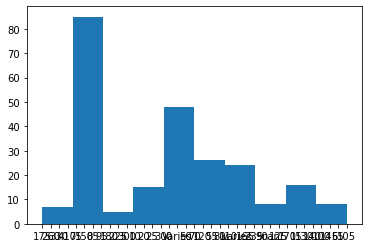

In [7]:
plt.hist(drinkMenu_df["Caffeine (mg)"].apply(str), 10)
plt.show()

#### Will Fill NUll Values with Median because the Distribution is Skewed as shown above

In [8]:
drinkMenu_df["Caffeine (mg)"] = drinkMenu_df["Caffeine (mg)"].replace("Varies",np.nan)
drinkMenu_df["Caffeine (mg)"] = drinkMenu_df["Caffeine (mg)"].replace("varies",np.nan)
drinkMenu_df["Caffeine (mg)"]= drinkMenu_df["Caffeine (mg)"].fillna(drinkMenu_df["Caffeine (mg)"].median())

 ### -Drop unnecessary Columns

In [9]:
drinkMenu_df.drop(["Saturated Fat (g)" , " Dietary Fibre (g)" , "Vitamin C (% DV)"],axis = 1,inplace = True)

#### Conclusion C : Unnecessary Columns (Saturated fat , fibres , vitamin c ) dropped 

## 3. Data Visualisations: Using plots to answers this questions
 ###  -Q1. Which drink has the highest calories from the dataset?

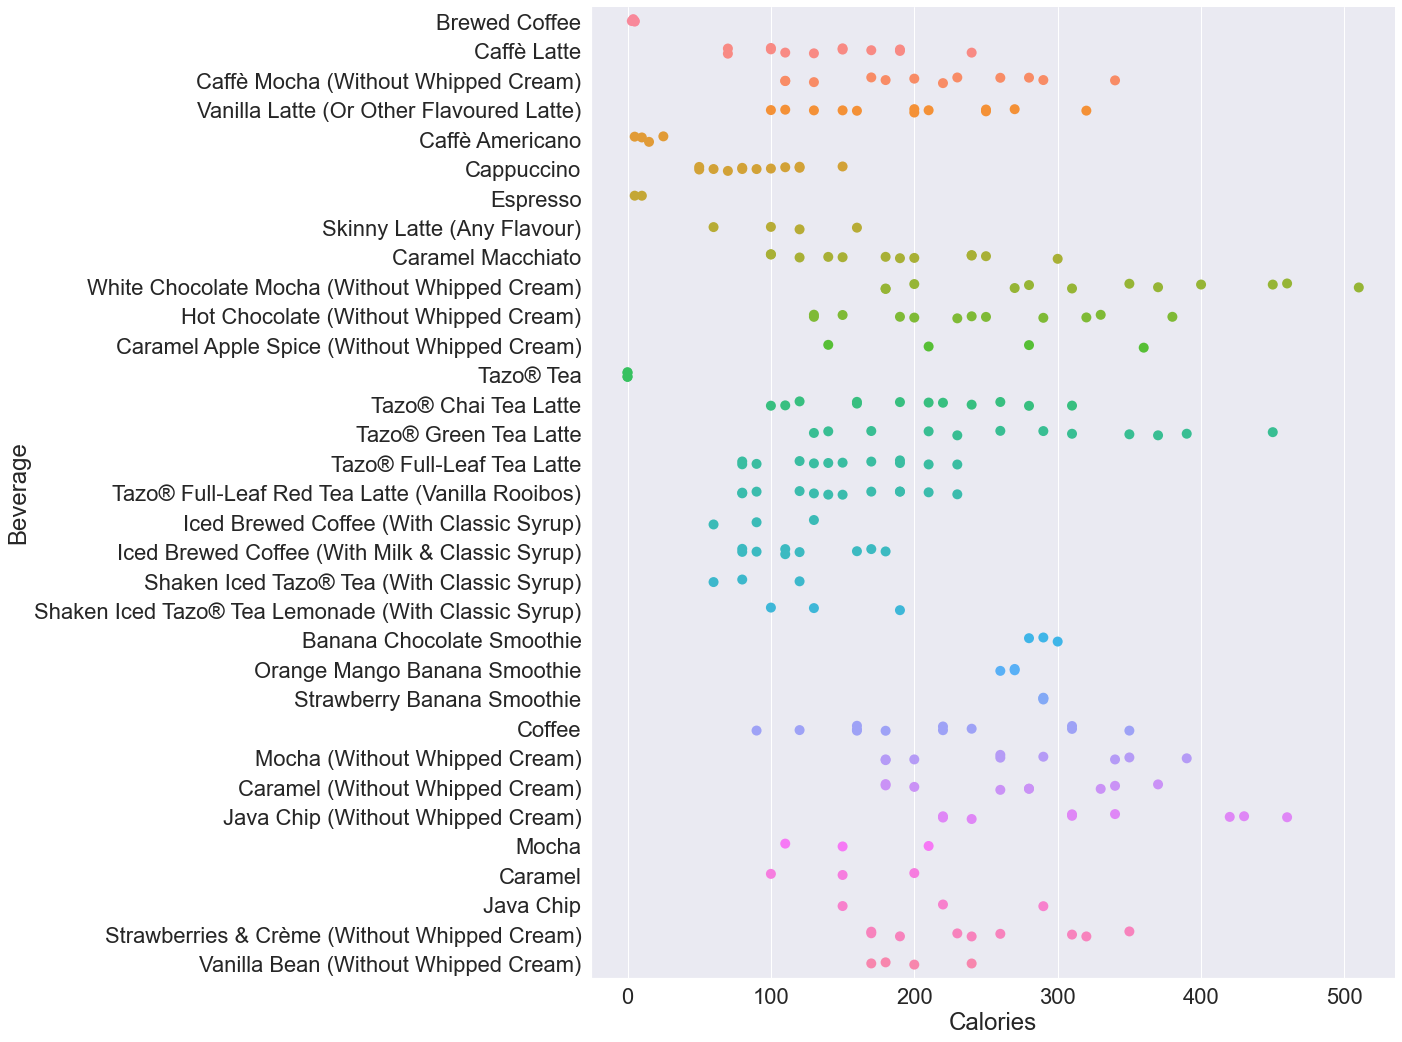

In [10]:
sns.set(font_scale=2)
sns.catplot(x='Calories' , y='Beverage' , data = drinkMenu_df , height=15 , aspect=20/15 ,s=10 )

#### Conclusion D : The drink with highest calories is " White Chocolate Mocha (Without Whipped Cream)"

### -Q2. Highest Sugar Drink ?

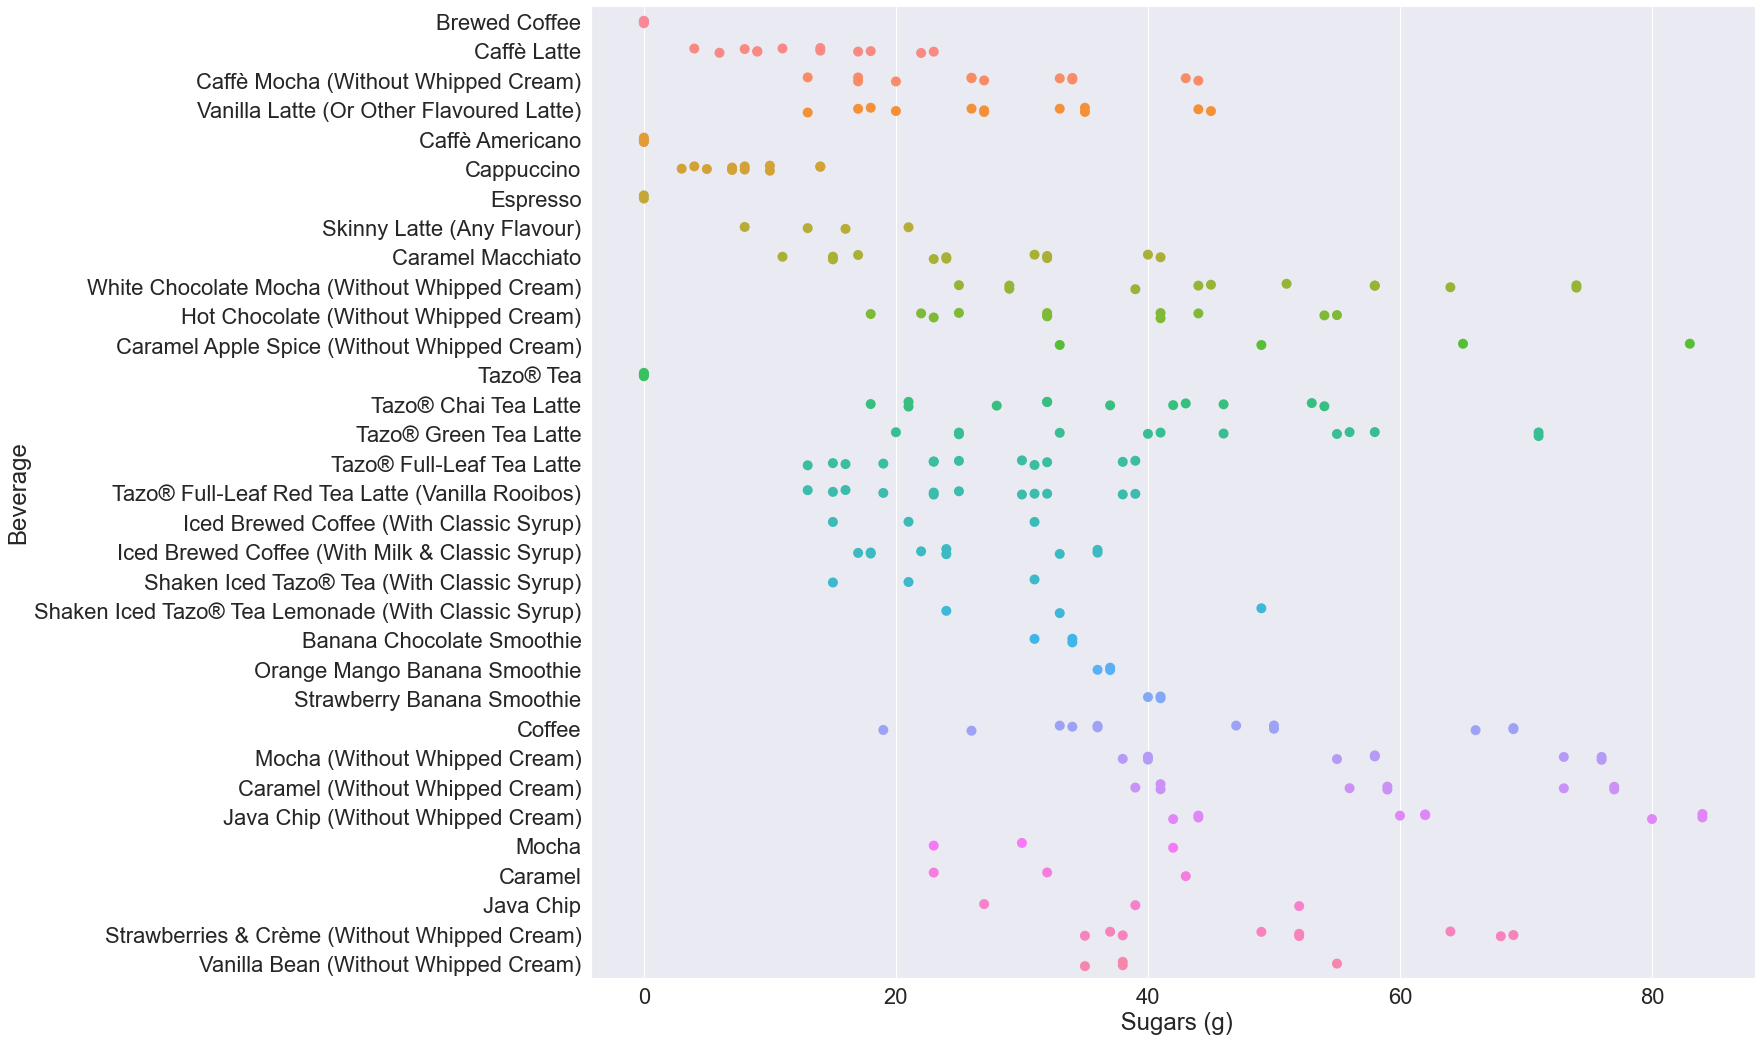

In [11]:
sns.set(font_scale=2)
sns.catplot(x=' Sugars (g)' , y='Beverage' , data = drinkMenu_df , height=15 , aspect=25/15 ,s=10 )

#### Conclusion E : The highest Sugar Drink is " Java Chip (Without Whipped Cream) "